In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


data = pd.read_csv('creditcard.csv')
print('总数据数量：{}\n'.format(len(data)))
data.head()

总数据数量：284807



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 0, 'Num')

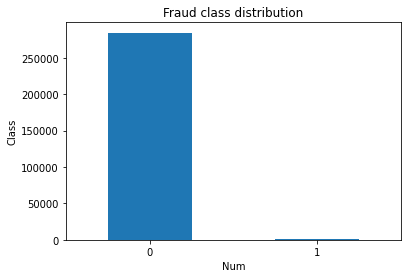

In [2]:
#标签的数值分布情况
data.Class.value_counts().plot(kind = 'bar',rot = 0)
plt.title('Fraud class distribution')
plt.ylabel('Class')
plt.xlabel('Num')

In [3]:
#第一种方式
pd.value_counts(data.Class).sort_index()

#第二种方式
data.Class.value_counts().sort_index()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#Z-score : 新数据=（原数据-均值）/标准差
#如果手写标准化
data['Amount_norm'] = (data['Amount'] - data['Amount'].mean())/ (data['Amount'].std())

#如果使用sklearn中的标准化
from sklearn.preprocessing import StandardScaler

data['norm_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data[['Amount_norm','norm_Amount']]

,Amount_norm,norm_Amount
0,0.244964,0.244964
1,-0.342474,-0.342475
2,1.160684,1.160686
3,0.140534,0.140534
4,-0.073403,-0.073403
...,...,...
284802,-0.350150,-0.350151
284803,-0.254116,-0.254117
284804,-0.081839,-0.081839
284805,-0.313248,-0.313249


In [6]:
#Min-max 标准化:新数据=（原数据-最小值）/（最大值-最小值）
#手写0-1标准化
data['norm_min_max'] = (data['Amount'] - data['Amount'].min())/ (data['Amount'].max() - data['Amount'].min())

#使用sklearn中工具包
from sklearn.preprocessing import MinMaxScaler

data['min_max_norm'] = MinMaxScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data[['norm_min_max','min_max_norm']]

,norm_min_max,min_max_norm
0,0.005824,0.005824
1,0.000105,0.000105
2,0.014739,0.014739
3,0.004807,0.004807
4,0.002724,0.002724
...,...,...
284802,0.000030,0.000030
284803,0.000965,0.000965
284804,0.002642,0.002642
284805,0.000389,0.000389


In [7]:
#0-1标准化的过程示例，只保留Z-score标准化的结果
data.drop(['Time','Amount','norm_Amount','norm_min_max','min_max_norm'],axis = 1,inplace = True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
# 得到所有异常样本的索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# 得到所有正常样本的索引
normal_indices = data[data.Class == 0].index

# 在正常样本中随机采样出指定个数的样本，并取其索引
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False) #注意replace参数的使用
random_normal_indices = np.array(random_normal_indices)

# 有了正常和异常样本后把它们的索引都拿到手
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# 根据索引得到降采样所有样本点
under_sample_data = data.iloc[under_sample_indices,:]

#再将获得的降采样的数据进行特征和标签的划分
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 降采样 样本比例
print("正常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("降采样策略总体样本数量: ", len(under_sample_data))

正常样本所占整体比例:  0.5
异常样本所占整体比例:  0.5
降采样策略总体样本数量:  984


In [9]:
from sklearn.model_selection import train_test_split

#取出所有的特征数据和标签数据
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

#整个数据集进行划分，注意random_state一定要设置一样的，因为要进行过采样的对比
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print('初始训练集包含样本数量：',len(X_train))
print('初始测试集包含样本数量：',len(X_test))
print('初始样本总数：',len(X_train) + len(X_test))

#降采样数据进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample,y_undersample,test_size = 0.3,random_state = 0
)

print("")
print("降采样训练集包含样本数量: ", len(X_train_undersample))
print("降采样测试集包含样本数量: ", len(X_test_undersample))
print("降采样样本总数: ", len(X_train_undersample)+len(X_test_undersample))

初始训练集包含样本数量： 199364
初始测试集包含样本数量： 85443
初始样本总数： 284807

降采样训练集包含样本数量:  688
降采样测试集包含样本数量:  296
降采样样本总数:  984


In [16]:
#关于召回率：Recall = TP/(TP+FN)
#调用逻辑回归模型
from sklearn.linear_model import LogisticRegression  
#调用k折交叉验证
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, classification_report

def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(5, shuffle = False)
    
    #定义不同的惩罚力度，数值越大惩罚力度越小，可以查看官网
    c_param_range = [0.01,0.1,1,10,100]
    
    #展示结果用的表格
    result_table = pd.DataFrame(index = range(len(c_param_range),2),columns = ['C_parameter','Mean recall score'])
    result_table['C_parameter'] = c_param_range
    
    #k-fold表示k折的交叉验证，这里会得到两个索引集合：训练集 = indices[0],验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-----------------------------')
        print('正则化惩罚力度：', c_param)
        print('-----------------------------')
        print('')
        
        recall_accs = []
        #一步步分解来执行交叉验证
        for iteration,indices in enumerate(fold.split(x_train_data)):
            #指定算法模型，并且给定参数，也可以尝试一下惩罚参数选择'l2'
            lr = LogisticRegression(C = c_param,penalty = 'l1',solver='liblinear')
            
            #训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            
            #建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            #有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            
            #一会还要算平均，这里就把每一步的结果保存起来
            recall_accs.append(recall_acc)
            print('Iteration {}: 召回率 = {}'.format(iteration,recall_acc))
            
        #当执行完所有交叉验证后，计算平均结果
        result_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1 
        print('')
        print('平均召回率',np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个recall高，自然就是最好的了
    best_c = result_table.loc[result_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    #打印最好的结果
    print('************************************************')
    print('效果最好的模型所选的参数 = ',best_c)
    print('************************************************')
    
    return best_c

In [11]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)


-----------------------------
正则化惩罚力度： 0.01
-----------------------------

Iteration 0: 召回率 = 0.958904109589041
Iteration 1: 召回率 = 0.9315068493150684
Iteration 2: 召回率 = 1.0
Iteration 3: 召回率 = 0.972972972972973
Iteration 4: 召回率 = 0.9848484848484849

平均召回率 0.9696464833451135

-----------------------------
正则化惩罚力度： 0.1
-----------------------------

Iteration 0: 召回率 = 0.8493150684931506
Iteration 1: 召回率 = 0.863013698630137
Iteration 2: 召回率 = 0.9491525423728814
Iteration 3: 召回率 = 0.9459459459459459
Iteration 4: 召回率 = 0.9090909090909091

平均召回率 0.9033036329066049

-----------------------------
正则化惩罚力度： 1
-----------------------------

Iteration 0: 召回率 = 0.863013698630137
Iteration 1: 召回率 = 0.8767123287671232
Iteration 2: 召回率 = 0.9830508474576272
Iteration 3: 召回率 = 0.9459459459459459
Iteration 4: 召回率 = 0.9242424242424242

平均召回率 0.9185930490086515

-----------------------------
正则化惩罚力度： 10
-----------------------------

Iteration 0: 召回率 = 0.863013698630137
Iteration 1: 召回率 = 0.863013698630137


In [12]:
def plot_confusion_matrix(cm,classes,
                          title = 'Confusion matrix',
                            cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation = 0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

召回率：  0.9523809523809523


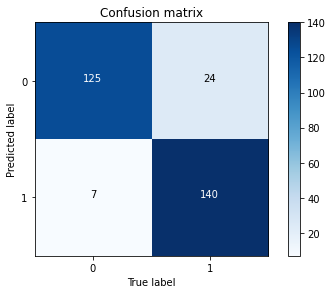

In [13]:
import itertools

lr = LogisticRegression(C=best_c,penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

#计算所需要的值
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision = 2)

print('召回率： ', cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))

#绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     )
plt.show()

召回率:  0.9387755102040817


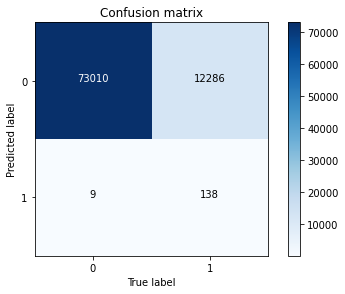

In [14]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

给定阈值为: 0.1 时测试集召回率:  1.0
给定阈值为: 0.2 时测试集召回率:  1.0
给定阈值为: 0.3 时测试集召回率:  1.0
给定阈值为: 0.4 时测试集召回率:  0.9931972789115646
给定阈值为: 0.5 时测试集召回率:  0.9523809523809523
给定阈值为: 0.6 时测试集召回率:  0.8979591836734694
给定阈值为: 0.7 时测试集召回率:  0.8367346938775511
给定阈值为: 0.8 时测试集召回率:  0.7551020408163265
给定阈值为: 0.9 时测试集召回率:  0.5918367346938775


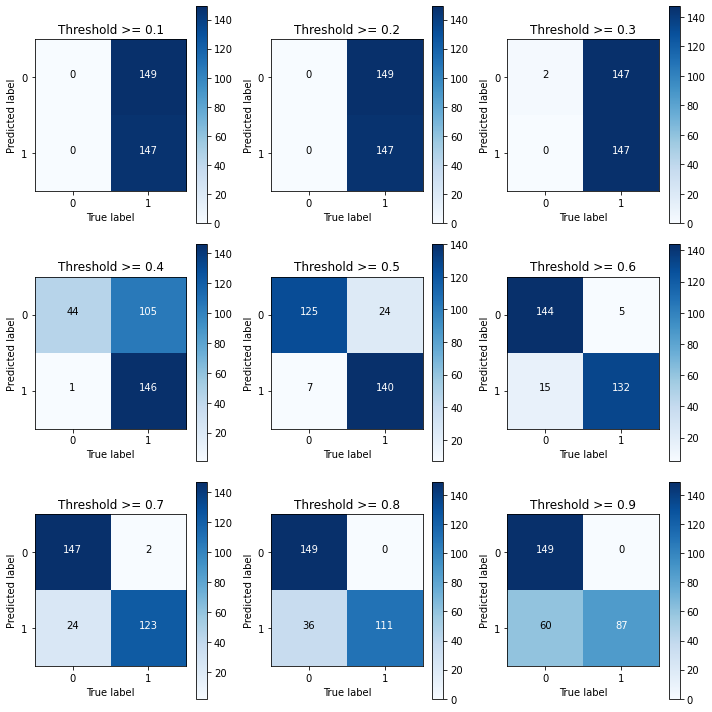

In [15]:
# 用之前最好的参数来进行建模
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')

# 训练模型，还是用降采样的数据集
lr.fit(X_train_undersample,y_train_undersample.values.ravel())

# 得到预测结果的概率值
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

#指定不同的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:",i,"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
